## WORD CLOUD

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

In [137]:
with open("data/alice_novel.txt", "r") as f:
  alice_novel =f.read()
print(alice_novel[:500])

﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: E


In [4]:
from wordcloud import WordCloud, STOPWORDS

In [6]:
STOPWORDS
# kata-kata ga penting

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [138]:
alice_wc = WordCloud(stopwords=STOPWORDS,
                     background_color="white",
                     max_words=2000
                     )
alice_wc.generate(alice_novel)

In [139]:
alice_wc

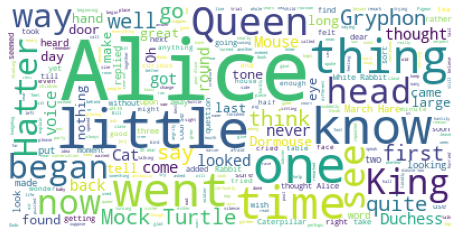

In [140]:
plt.figure(figsize=(8,5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [14]:
"said" in STOPWORDS

False

In [15]:
"must" in STOPWORDS

False

In [141]:
STOPWORDS.add("must")
STOPWORDS.add("said")
STOPWORDS.add("much")

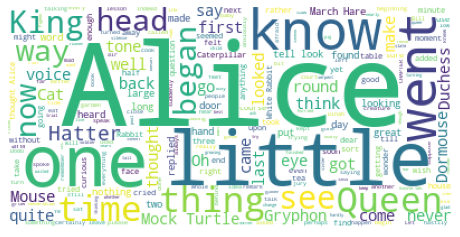

In [142]:
alice_wc.generate(alice_novel)
plt.figure(figsize=(8,5))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [21]:
# harus jadiin numpy array biar bisa word cloud
img = Image.open("data/alice_mask.png")
alice_mask = np.array(img)
print(alice_mask, alice_mask.shape)
#type(img)
#img
#ukuran image (900,900)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] (900, 900)


In [20]:
type(img)

PIL.PngImagePlugin.PngImageFile

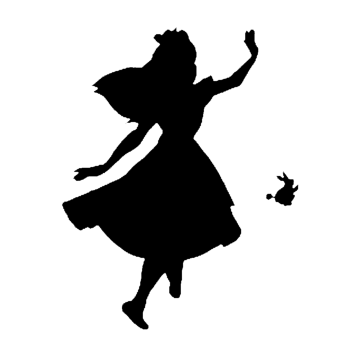

In [22]:
plt.figure(figsize=(6,10))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [143]:
# khusus yang putih-putih ga akan dipakai
alice_wc = WordCloud(stopwords=STOPWORDS,
                     background_color="white",
                     max_words=2000,
                     mask= alice_mask
                     )
alice_wc.generate(alice_novel)

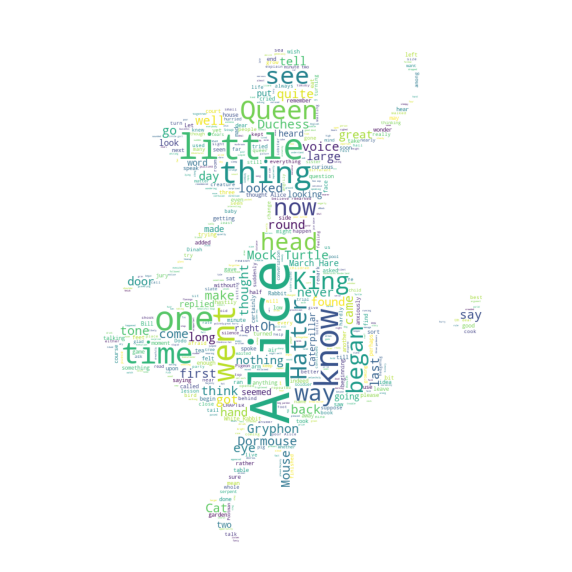

In [144]:
plt.figure(figsize=(10,14))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

In [136]:
df_canada = pd.read_excel("data/Canada.xlsx", sheet_name ="Canada by Citizenship",
                         skiprows = range(20), skipfooter =2)
df_canada.drop(columns=["Type", "Coverage","AREA", "REG", "DEV"], inplace=True)
df_canada.rename(columns={"OdName": "Country", "AreaName": "Area", "RegName":"Region"}, inplace=True)
df_canada["Total"] = df_canada.sum(axis=1)
df_canada.head()

,Country,Area,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [62]:
#df_canada = df_canada.iloc[:, :-8]

In [76]:
#df_canada.drop(columns=["Type", "Coverage","AREA", "REG", "DEV"], inplace=True)
#df_canada.rename(columns={"OdName": "Country", "AreaName": "Area", "RegName":"Region"}, inplace=True)
#df_canada["Total"] = df_canada.sum(axis=1)
#df_canada

,Country,Area,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59,1677


In [150]:
max_words = 1000
text = ""

for country in df_canada.Country:
  if len(country.split(" ")) == 1:
    repeat_country = int(
        max_words * df_canada.loc[df_canada.Country == country, "Total"] / float(df_canada.Total.sum())
                         )
    text = text + ((country + " " ) * repeat_country)
print(text)


Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China C

In [147]:
int(90* (df_canada[df_canada.Country == "China"] ["Total"] / df_canada.Total.sum()))

9

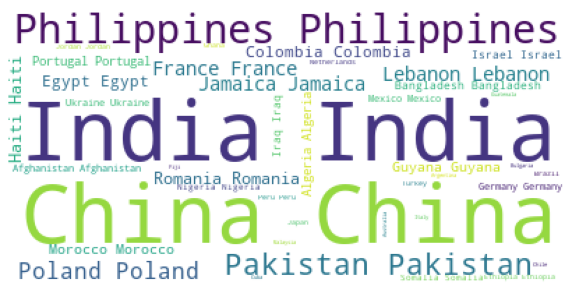

In [151]:
# masih aneh
canada_wc = WordCloud(background_color="white")
canada_wc.generate(text)

plt.figure(figsize=(10,14))
plt.imshow(canada_wc)
plt.axis("off")
plt.show()

In [152]:
df_canada[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635
1,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620
2,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774
3,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731
191,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
192,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174
193,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46


In [160]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
years = list(range(1980, 2014))
df_total.index = years
df_total.reset_index(inplace =True)
df_total.columns=["Years","Total"]
#df_total

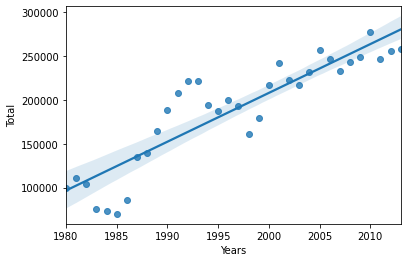

In [161]:
sns.regplot(x="Years", y="Total", data=df_total)
plt.show()
#sns.regplot(x=df_canada["Years"], y=df_canada["Total"])

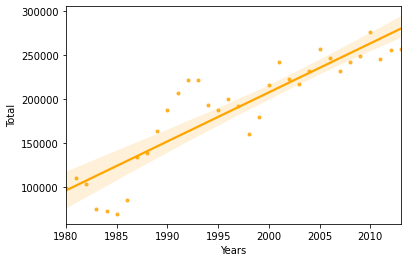

In [162]:
sns.regplot(x="Years", y="Total", data=df_total, color="orange", marker=".")
plt.show()

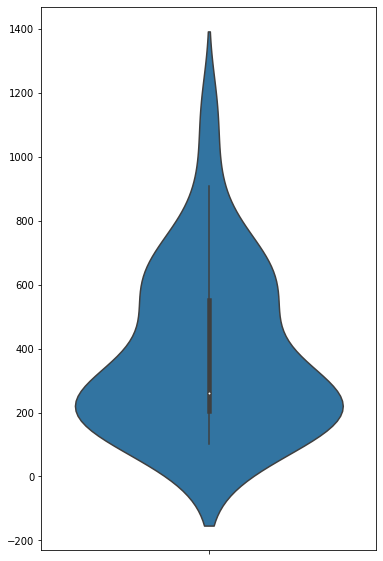

In [87]:
plt.figure(figsize =(6,10))
sns.violinplot(y = df_canada.loc[df_canada.Country == "Indonesia", years].values)
plt.show()

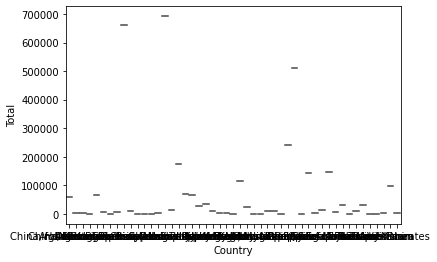

In [91]:
sns.violinplot(x="Country",y="Total", data= df_canada[df_canada.Area == "Asia"])

In [92]:
data_seaborn = sns.load_dataset("tips")

In [93]:
data_seaborn

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


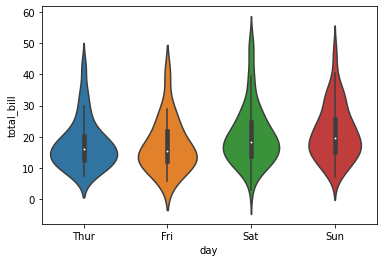

In [95]:
sns.violinplot(x="day", y="total_bill", data = data_seaborn)

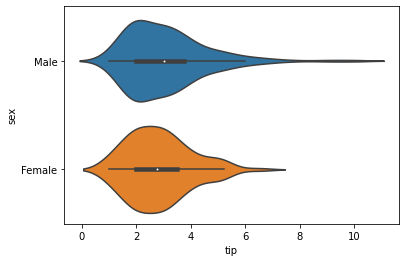

In [99]:
sns.violinplot(x="tip", y="sex", data=data_seaborn)
plt.show()

## FOLIUM

In [103]:
! pip install folium

In [105]:
folium.__version__

'0.8.3'

In [106]:
world_map = folium.Map()
world_map

In [110]:
hacktiv8_map = folium.Map(location=[-6.259545565338162, 106.78195568766947], zoom_start=15, tiles ="Stamen Terrain")
hacktiv8_map

In [111]:
df_incidents = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

In [112]:
df_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [113]:
df_incidents.shape

(150500, 13)

In [118]:
sample_incidents= df_incidents.sample(n=100, random_state=111) # random
sample_incidents

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
136036,166300900,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Saturday,12/17/2016 12:00:00 AM,13:00,PARK,NONE,2600 Block of GEARY BL,-122.446613,37.782246,"(37.7822458223917, -122.446612978839)",16630090006244
81420,160800867,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,10/02/2016 12:00:00 AM,12:30,RICHMOND,NONE,34TH AV / CLEMENT ST,-122.494521,37.781575,"(37.7815746718896, -122.494521109472)",16080086706244
39141,160119373,ASSAULT,INFLICT INJURY ON COHABITEE,Tuesday,02/09/2016 12:00:00 AM,16:57,INGLESIDE,"ARREST, BOOKED",0 Block of STONEYFORD AV,-122.421081,37.730284,"(37.7302836940584, -122.421080787461)",16011937315040
119621,160482277,LARCENY/THEFT,GRAND THEFT FROM PERSON,Tuesday,06/14/2016 12:00:00 AM,07:05,SOUTHERN,NONE,500 Block of BRANNAN ST,-122.397713,37.777470,"(37.7774696662398, -122.397713226445)",16048227706153
113530,166027364,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Tuesday,01/19/2016 12:00:00 AM,13:37,PARK,NONE,1800 Block of MCALLISTER ST,-122.442526,37.777321,"(37.7773210998476, -122.4425263249)",16602736419050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13663,160362607,BURGLARY,"BURGLARY OF RESIDENCE, FORCIBLE ENTRY",Sunday,05/01/2016 12:00:00 AM,21:00,INGLESIDE,NONE,1700 Block of SANCHEZ ST,-122.428891,37.741016,"(37.7410156428706, -122.428891058718)",16036260705041
30136,160212911,BURGLARY,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",Friday,03/04/2016 12:00:00 AM,05:30,NORTHERN,NONE,300 Block of IVY ST,-122.423922,37.777297,"(37.7772967916287, -122.423922154334)",16021291105013
35820,160209350,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Saturday,03/12/2016 12:00:00 AM,00:25,RICHMOND,"ARREST, BOOKED",3100 Block of WASHINGTON ST,-122.445144,37.790275,"(37.7902748088243, -122.445143689223)",16020935004138
142523,160647415,DRUG/NARCOTIC,SALE OF METH-AMPHETAMINE,Thursday,08/11/2016 12:00:00 AM,12:17,TENDERLOIN,"ARREST, BOOKED",EDDY ST / LEAVENWORTH ST,-122.414243,37.783724,"(37.7837240254478, -122.414242955907)",16064741516654


In [123]:
latitude = 37.77
longtitude = -122.42
sf_map = folium.Map(location=(latitude, longtitude),zoom_start =12)

In [124]:
sf_map

In [130]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
  incidents.add_child(
      folium.Circle(
          [lat, lng],
          radius=5,
          color="yellow",
          fill=True,
          fill_color = "blue",
          fill_opacity=.5
      )
  )

for lat, lng, label in zip(sample_incidents.Y, sample_incidents.X, sample_incidents.Category):
  folium.Marker((lat, lng), popup=label).add_to(sf_map)

sf_map.add_child(incidents)

In [135]:
sf_map = folium.Map(location=(latitude, longtitude),zoom_start =12)
incidents = plugins.MarkerCluster().add_to(sf_map)

for lat, lng in zip(sample_incidents.Y, sample_incidents.X):
      folium.Marker(
          [lat, lng],
          popup=label,
          icon=None,).add_to(incidents)
sf_map